# Salary Task
### Hassan Anees

Linear RegrRegression
---

---

In [134]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

In [135]:
file_path = "/content/Salary.csv"
salary = pd.read_csv(file_path)

In [136]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [137]:
x = salary[['YearsExperience']]
y = salary[['Salary']]

In [138]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


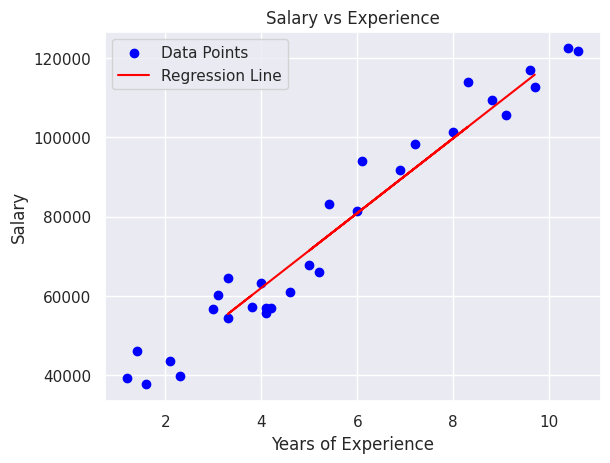

In [139]:
plt.scatter(x, y, color = 'blue', label='Data Points')
plt.plot(x_test, y_pred, color = 'red', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.legend(labels = ['Data Points', 'Regression Line'])
plt.show()

 ## Test The Model

In [140]:
def predict_salary(years_experience):
    predicted_salary = model.predict([[years_experience]])
    return predicted_salary[0]

In [141]:
Sal = predict_salary(0)
Sal

array([24380.20147947])

---
## Polynomial RegreRegression
---

In [142]:
from sklearn.preprocessing import PolynomialFeatures

In [143]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [144]:
degree = 20

poly_reg = PolynomialFeatures(degree=degree)
x_train_poly = poly_reg.fit_transform(x_train)
x_test_poly = poly_reg.transform(x_test)

In [145]:
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)

LinearRegression()

In [146]:
y_pred = poly_model.predict(x_test_poly)

y_pred


array([[117670.93231912],
       [ 68602.04416929],
       [104921.86691136],
       [ 76468.27216553],
       [ 49337.40717093],
       [ 51708.02318789]])

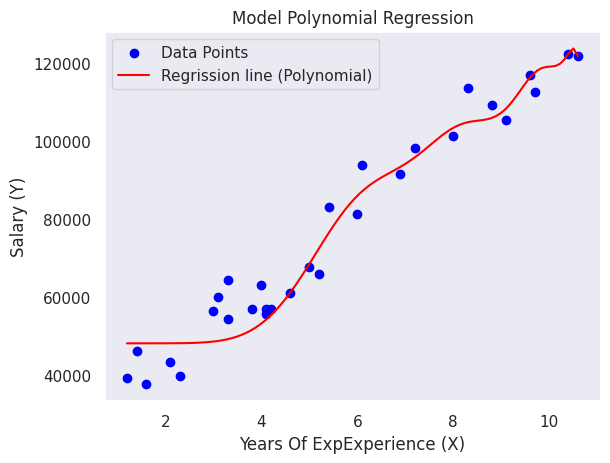

In [147]:
plt.scatter(x, y, color="blue", label="Data Points")
x_curve = np.linspace(x.min(), x.max(), 100)
x_curve_poly = poly_reg.transform(x_curve.reshape(-1, 1))
y_curve_pred = poly_model.predict(x_curve_poly)
plt.plot(x_curve, y_curve_pred, color="red", label="Regrission line (Polynomial)")
plt.xlabel("Years Of ExpExperience (X)")
plt.ylabel("Salary (Y)")
plt.title("Model Polynomial Regression")
plt.legend()
plt.grid()
plt.show()

# End Of Salary Task

---
## LogistLogistic RegrRegression
---

In [148]:
from tensorflow import keras
from keras.datasets import mnist

In [149]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
pixel_value = x_train[244][15][15] # 60000 image with 28*28 pixle
pixel_value , x_train.shape, y_train.shape

(226, (60000, 28, 28), (60000,))

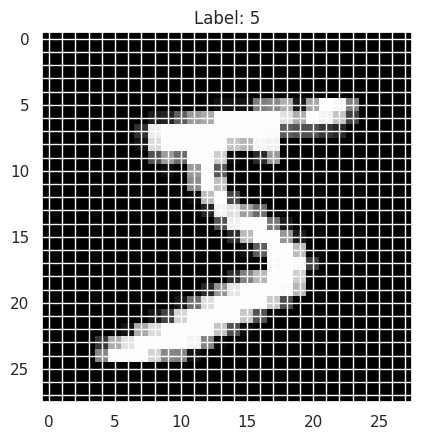

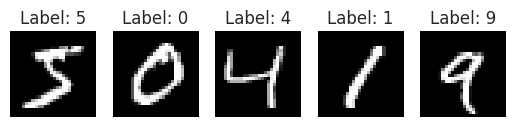

In [150]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# ... (load MNIST data as (x_train, y_train), (x_test, y_test)) ...

# Display a single image
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")

# Customize ticks for single image plot (if needed)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5)) # Major ticks every 5 pixels
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1)) # Minor ticks every pixel
ax.yaxis.set_major_locator(ticker.MultipleLocator(5)) # Same for y-axis
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.grid(True, which='both') # Show grid (optional)

plt.show()

# Display multiple images
num_samples = 5
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")

    # Customize ticks for each subplot (if needed)
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))

    plt.grid(True, which='both') # Show grid (optional)
    plt.axis('off')  # Hide axis ticks

plt.show()

In [151]:
x_train_final = x_train.reshape(len(x_train), 28*28)
x_test_final = x_test.reshape(len(x_test), 28*28)

In [152]:
x_train_final.shape, x_test_final.shape

((60000, 784), (10000, 784))

In [153]:
x_train_final = x_train_final/255
x_test_final  = x_test_final/255

In [154]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [156]:
model = Sequential()
model.add(Dense(10, input_shape=(784,)))
model.add(Activation('softmax'))
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [158]:
result = model.fit(
    x = x_train_final,
    y =  y_train,
    shuffle= True,
    epochs=30,
    batch_size=16,
    validation_data=(x_test_final, y_test)
    )

Epoch 1/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7770 - loss: 0.9109 - val_accuracy: 0.8951 - val_loss: 0.4002
Epoch 2/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8912 - loss: 0.4028 - val_accuracy: 0.9065 - val_loss: 0.3487
Epoch 3/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9031 - loss: 0.3578 - val_accuracy: 0.9113 - val_loss: 0.3273
Epoch 4/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9060 - loss: 0.3411 - val_accuracy: 0.9149 - val_loss: 0.3148
Epoch 5/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9097 - loss: 0.3251 - val_accuracy: 0.9162 - val_loss: 0.3069
Epoch 6/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9120 - loss: 0.3154 - val_accuracy: 0.9174 - val_loss: 0.3008
Epoch 7/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9142 - loss: 0.3073 - val_accuracy: 0.9176 - val_loss: 0.2964
Epoch 8/30
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9136 - loss: 0.3095

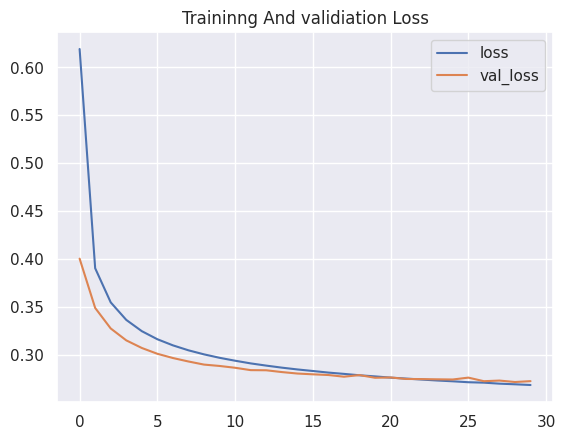

In [160]:
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.title('Traininng And validiation Loss')
plt.legend()
plt.show()


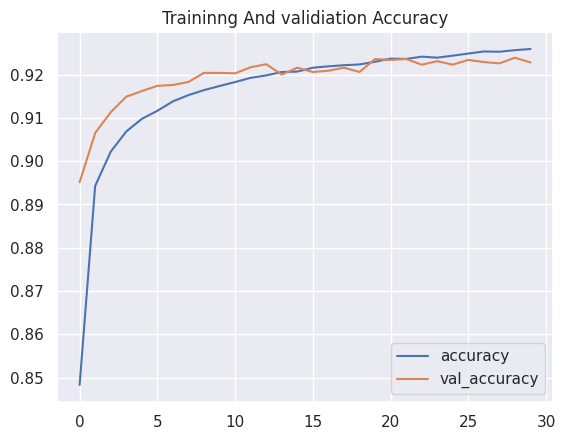

In [161]:
plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result.history['val_accuracy'], label='val_accuracy')
plt.title('Traininng And validiation Accuracy')
plt.legend()
plt.show()

## *Thanks*